## Data preprocessing

In [ ]:
print("Hi TA's. Please consider our request to look at both this notebook and a second notebook with the code for our second model which we presented in our final ppt.")
print("We thought we could share only one notebook in the code. So adding the link here")
print("https://colab.research.google.com/drive/1sO60kX-EE-67Qdg27-4hLkcUlK2v6Qdk?usp=sharing")

Hi TA's. Please consider our request to look at both this notebook and a second notebook with the code for our second model which we presented in our final ppt.
We thought we could share only one notebook in the code. So adding the link here
https://colab.research.google.com/drive/1sO60kX-EE-67Qdg27-4hLkcUlK2v6Qdk?usp=sharing


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.DataFrame([],columns=['bibcode', 'label_studio_id', 'ner_ids', 'ner_tags', 'section',
       'tokens', 'unique_id'])

In [ ]:
with open("/content/WIESP2022-NER-TRAINING.jsonl", 'r') as f:
    wiesp_dev_json = [json.loads(l) for l in list(f)]

In [ ]:
for i in wiesp_dev_json:
  df=df.append(pd.DataFrame(i))

In [ ]:
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S


In [ ]:
d = dict(df['ner_tags'].value_counts())

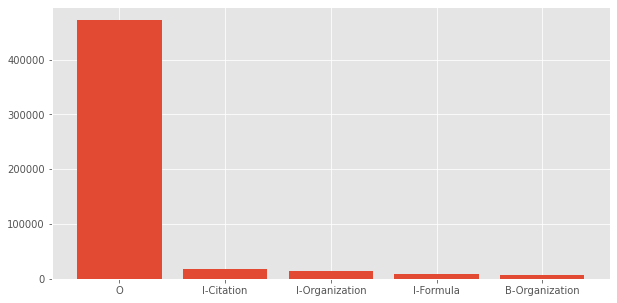

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
plt.bar(list(d.keys())[:5],list(d.values())[:5],)
plt.show()

In [ ]:
sent=list(df['unique_id'].unique())

In [ ]:
print(sent[0])

fulltext_487_2019MNRAS.486.5558S


In [ ]:
words = set(list(df['tokens'].values))
words.add('PAD')
n_words = len(words)
n_words

48992

In [ ]:
tags = list(set(df["ner_tags"].values))
n_tags = len(tags)
n_tags

63

In [ ]:
agg_func = lambda s: [(w, t) for w, t in zip(s["tokens"].values.tolist(),s["ner_tags"].values.tolist())]

In [ ]:
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S


In [ ]:
sentences = [df.groupby("unique_id").apply(agg_func)[i] for i in sent]

In [ ]:
token_sentences = pd.DataFrame(df[['unique_id','tokens']].groupby('unique_id')['tokens'].apply(list))

In [ ]:
ner_tags_sentences = pd.DataFrame(df[['unique_id','ner_tags']].groupby('unique_id')['ner_tags'].apply(list))

In [ ]:
sentences.head()

AttributeError: ignored

In [ ]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 795 words


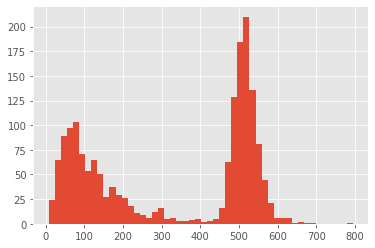

In [ ]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins= 50)
plt.show()

In [ ]:
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}
print(words2index['combine'])
print(tags2index['B-Instrument'])

4202
17


In [ ]:
df['tokens_idx'] = df['tokens'].map(words2index)
df['ner_tags_idx'] = df['ner_tags'].map(tags2index)
df.head()

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,tokens_idx,ner_tags_idx
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S,39027,56
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S,48470,56
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S,34859,56
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S,10352,56
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S,39788,56


In [ ]:
for w in sentences[:5]:
  print(w)

[('Whilst', 'O'), ('a', 'O'), ('reasonable', 'O'), ('harmonic', 'O'), ('fit', 'O'), ('to', 'O'), ('the', 'O'), ('ESPaDOnS', 'B-Instrument'), ('data', 'O'), ('can', 'O'), ('be', 'O'), ('achieved', 'O'), ('using', 'O'), ('this', 'O'), ('period,', 'O'), ('it', 'O'), ('does', 'O'), ('not', 'O'), ('produce', 'O'), ('an', 'O'), ('acceptable', 'O'), ('phasing', 'O'), ('of', 'O'), ('all', 'O'), ('available', 'O'), ('〈', 'O'), ('B', 'O'), ('z', 'O'), ('〉', 'O'), ('measurements.', 'O'), ('Figure', 'O'), ('1.', 'O'), ('Photometric', 'O'), ('(', 'O'), ('top', 'O'), (')', 'O'), ('and', 'O'), ('magnetic', 'O'), ('〈', 'O'), ('B', 'O'), ('z', 'O'), ('〉', 'O'), ('(', 'O'), ('bottom', 'O'), (')', 'O'), ('measurements,', 'O'), ('phased', 'O'), ('with', 'O'), ('periods', 'O'), ('determined', 'O'), ('from', 'O'), ('(left', 'O'), ('to', 'O'), ('right)', 'O'), ('K2', 'B-Mission'), ('photometry,', 'O'), ('all', 'O'), ('〈', 'O'), ('B', 'O'), ('z', 'O'), ('〉', 'O'), ('measurements,', 'O'), ('and', 'O'), ('all',

In [ ]:
max_len = 800
X = [s for s in token_sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PAD")
    new_X.append(new_seq)
new_X[15]

IndexError: ignored

In [ ]:
len(new_X),len(new_X[0]),max([len(i) for i in new_X])

(1, 800, 800)

In [ ]:
ner_tags_sentences['ner_tags'][0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Organization',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'O',
 'O',
 'O',
 'B-Telescope',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Telescope',
 'B-Wavelength',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Organization',
 'I-Organization',
 'O',
 'B-Organization',
 'I-Organization',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Wavelength',
 'O',
 'O',
 'B-CelestialObject',
 'I-CelestialObject',
 'O',
 'O',
 'B-Person',
 'O',
 'O',
 'O',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'B-Person',
 'I-Person',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Telescope',
 'I-Telescope',
 'I-Telescope',
 'I-Telescope',
 'O',
 'O',
 'O',
 'B-Organization',
 'I-Organization',
 'I-Organi

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
y = [[tags2index[tag] for tag in s] for s in ner_tags_sentences['ner_tags']]
# y = []
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
y[15]

array([62, 56, 56, 62,  9, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 62,
        9, 56, 62,  9, 56, 56, 56, 56, 56, 56, 56, 56, 56, 62, 62, 56, 62,
       56, 56, 56, 56, 51, 27, 27, 27, 27, 27, 27, 27, 51, 56, 56, 56, 62,
        9, 56, 56, 45, 29, 29, 29, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,
       56, 62, 56, 62,  9, 56, 56, 56, 56, 56, 50, 30, 60, 60, 60, 56, 56,
       56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 45, 56, 56, 31, 22, 22,
       22, 22, 22, 22, 62, 56, 56, 56, 56, 56, 56, 45, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 56, 56, 56, 31, 56, 31, 56, 56, 56, 31, 22, 22,
       56, 56, 56, 56, 56, 56, 45, 29, 29, 29, 29, 56, 56, 31, 56, 56, 56,
       56, 56, 56, 45, 29, 56, 56, 31, 22, 22, 31, 56, 56, 56, 56, 56, 56,
       56, 56, 56, 56, 56, 56, 56, 56, 35, 18, 18, 18, 18, 18, 56, 45, 29,
       29, 29, 29, 29, 56, 56, 56, 45, 29, 29, 29, 29, 29, 29, 29, 29, 56,
       56, 56, 31, 56, 56, 56, 56, 35, 18, 56, 45, 29, 56, 56, 56, 56, 56,
       56, 56, 56, 56, 56

In [ ]:
import numpy as np
depth=n_tags
# y = tf.one_hot(y, depth)
y2 = np.eye(depth)[y]

In [ ]:
n_tags

63

In [ ]:
batch_size=1024

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tok = Tokenizer(oov_token="<OOV>")

In [ ]:
sentences = token_sentences['tokens']

In [ ]:
tok.fit_on_texts(sentences)
X2 = tok.texts_to_sequences(sentences)
padded_X = pad_sequences(X2,padding="post",maxlen=800)

In [ ]:
import json
# json_ob= json.dumps(tok.word_index,indent=4)
with open("training_word_index_new.json","w") as outfile:
  json.dump(tok.word_index, outfile)

In [ ]:
padded_X.shape

(1753, 800)

In [ ]:
# from keras.utils import to_categorical
# y2 = [tf.keras.utils.to_categorical(i, num_classes=n_tags) for i in y]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(new_X_padded, y, test_size=0.1, random_state=2021)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(padded_X, y2, test_size=0.1, random_state=2021)

In [ ]:
# y_tr, y_val = y_tr[:1213*batch_size], y_tr[-135*batch_size:]
import tensorflow as tf
y_tr = tf.convert_to_tensor(y_tr)
y_val = tf.convert_to_tensor(y_val)

# y_tr = tf.reshape(y_tr, (y_tr.shape[0], y_tr.shape[1], y_tr.shape[2],1))
# y_val = tf.reshape(y_val,(y_val.shape[0], y_val.shape[1], y_tr.shape[2],1))

In [ ]:
X_tr = tf.convert_to_tensor(X_tr)
X_val = tf.convert_to_tensor(X_val)

In [ ]:
y_tr.shape,y_val.shape

(TensorShape([1577, 800, 63]), TensorShape([176, 800, 63]))

In [ ]:
X_tr.shape,X_val.shape

(TensorShape([1577, 800]), TensorShape([176, 800]))

In [ ]:
# batch_size=32
# train_data = tf.data.Dataset.from_tensor_slices((X_tr,y_tr)).batch(batch_size)
# val_data =   tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(batch_size)

In [ ]:
# train_data.element_spec

(TensorSpec(shape=(None, 800), dtype=tf.string, name=None),
 TensorSpec(shape=(None, 800), dtype=tf.int32, name=None))

## Glove and model training

In [ ]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2022-07-29 20:18:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-29 20:18:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-29 20:18:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’


In [ ]:
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [ ]:
import numpy as np
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# from numpy import asarray
# from numpy import savetxt
# savetxt('embeddings_index.csv', embeddings_index, delimiter=',',fmt="%s")

In [ ]:
len(list(word_index.keys()))

157

In [ ]:
max_length=100
word_index=tok.word_index
embedding_matrix = np.zeros((len(tok.word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
n_tokens = 63
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential

model_1 = Sequential([
    Input((800,)),
    embedding_layer,
    SimpleRNN(150, return_sequences=True), 
    SimpleRNN(150,return_sequences=True),
    # Dense(128, activation='relu'),
    Dense(n_tokens, activation='softmax')
])

In [ ]:
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 100)          4575500   
                                                                 
 simple_rnn (SimpleRNN)      (None, 800, 150)          37650     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 800, 150)          45150     
                                                                 
 dense (Dense)               (None, 800, 63)           9513      
                                                                 
Total params: 4,667,813
Trainable params: 4,667,813
Non-trainable params: 0
_________________________________________________________________


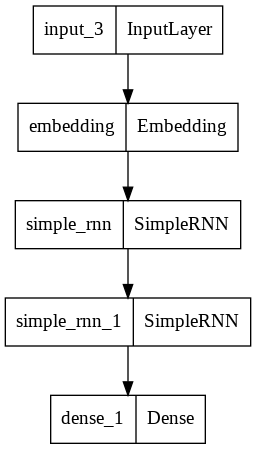

In [ ]:
tf.keras.utils.plot_model(model_1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
%load_ext tensorboard
%rm -rf logs

log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]
num_epochs = 10
history = model_1.fit(X_tr, y_tr, epochs=num_epochs, validation_data=(X_val, y_val),callbacks=callbacks)

Epoch 1/10
50/50 [==============================] - 51s 983ms/step - loss: 0.6902 - accuracy: 0.8938 - val_loss: 0.3621 - val_accuracy: 0.9327
Epoch 2/10
50/50 [==============================] - 47s 933ms/step - loss: 0.2848 - accuracy: 0.9418 - val_loss: 0.2603 - val_accuracy: 0.9455
Epoch 3/10
50/50 [==============================] - 48s 959ms/step - loss: 0.2171 - accuracy: 0.9527 - val_loss: 0.2184 - val_accuracy: 0.9525
Epoch 4/10
50/50 [==============================] - 47s 931ms/step - loss: 0.1809 - accuracy: 0.9587 - val_loss: 0.1939 - val_accuracy: 0.9566
Epoch 5/10
50/50 [==============================] - 49s 980ms/step - loss: 0.1557 - accuracy: 0.9633 - val_loss: 0.2114 - val_accuracy: 0.9574
Epoch 6/10
50/50 [==============================] - 48s 955ms/step - loss: 0.1363 - accuracy: 0.9670 - val_loss: 0.1658 - val_accuracy: 0.9613
Epoch 7/10
50/50 [==============================] - 48s 959ms/step - loss: 0.1213 - accuracy: 0.9699 - val_loss: 0.1577 - val_accuracy: 0.9627

In [ ]:
history.history

{'accuracy': [0.8937832713127136,
  0.9417985081672668,
  0.9526807069778442,
  0.958734929561615,
  0.9633116722106934,
  0.9669618010520935,
  0.9699453115463257,
  0.9728463888168335,
  0.9758259057998657,
  0.9783346652984619],
 'loss': [0.6902183890342712,
  0.284846693277359,
  0.2170804888010025,
  0.18087980151176453,
  0.15568388998508453,
  0.13629195094108582,
  0.12133392691612244,
  0.10851617157459259,
  0.09675756096839905,
  0.08685769140720367],
 'val_accuracy': [0.9326704740524292,
  0.9455326795578003,
  0.9524716138839722,
  0.9565837979316711,
  0.9574431777000427,
  0.9613352417945862,
  0.9627059698104858,
  0.9644957184791565,
  0.9656746983528137,
  0.966377854347229],
 'val_loss': [0.3621494770050049,
  0.26026496291160583,
  0.21838578581809998,
  0.1939316689968109,
  0.21135558187961578,
  0.16581766307353973,
  0.15774458646774292,
  0.15116730332374573,
  0.14705848693847656,
  0.14500904083251953]}

In [ ]:
model_1.save_weights("10epochs_glove_embeddings.h5")

In [ ]:
model_1.weights[0]

<tf.Variable 'embedding/embeddings:0' shape=(45755, 100) dtype=float32, numpy=
array([[-6.1713215e-03, -6.0671135e-03, -6.7377356e-03, ...,
         6.3105565e-03,  7.3064603e-03,  4.3025003e-03],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.5178192e-02, -2.0897773e-01,  7.2684425e-01, ...,
        -2.0378561e-01,  8.0751991e-01,  2.7196217e-01],
       ...,
       [-4.3187767e-02,  5.1920827e-02,  3.4548189e-02, ...,
        -4.8452582e-02,  3.5700716e-02,  4.7400005e-02],
       [-3.3898074e-02,  4.9271077e-02,  2.8554309e-02, ...,
        -4.3159299e-02,  1.3774307e-02,  5.0899748e-02],
       [ 1.0645098e-02, -1.9472668e-02,  7.4555585e-04, ...,
         2.0092387e-02,  2.0514445e-03, -2.1423623e-02]], dtype=float32)>

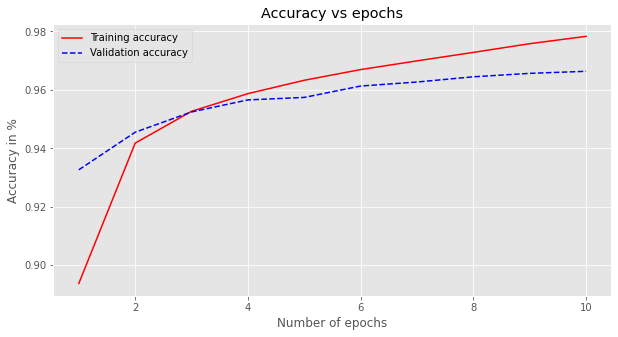

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
x1=np.array([i for i in range(1,11)])


l1=plt.plot(x1,history.history["accuracy"], color="r")
l2=plt.plot(x1,history.history["val_accuracy"], color="b", linestyle="dashed")
plt.title("Accuracy vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy in %")
plt.legend(["Training accuracy","Validation accuracy"])
plt.show()

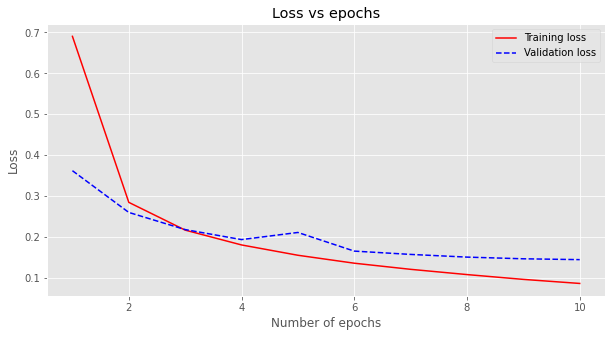

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
x1=np.array([i for i in range(1,11)])


l1=plt.plot(x1,history.history["loss"], color="r")
l2=plt.plot(x1,history.history["val_loss"], color="b", linestyle="dashed")
plt.title("Loss vs epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(["Training loss","Validation loss"])
plt.show()

## Validation data load

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.DataFrame([],columns=['bibcode', 'label_studio_id', 'section',
       'tokens', 'unique_id'])

In [ ]:
with open("/content/WIESP2022-NER-VALIDATION-NO-LABELS.jsonl", 'r') as f:
    wiesp_dev_json = [json.loads(l) for l in list(f)]

In [ ]:
for i in wiesp_dev_json:
  df=df.append(pd.DataFrame(i))

In [ ]:
df.head()

,bibcode,label_studio_id,section,tokens,unique_id,ner_ids,ner_tags
0,2019MNRAS.486.5558S,487,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S,62.0,O
1,2019MNRAS.486.5558S,487,fulltext,a,fulltext_487_2019MNRAS.486.5558S,62.0,O
2,2019MNRAS.486.5558S,487,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S,62.0,O
3,2019MNRAS.486.5558S,487,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S,62.0,O
4,2019MNRAS.486.5558S,487,fulltext,fit,fulltext_487_2019MNRAS.486.5558S,62.0,O


In [ ]:
sent=list(df['unique_id'].unique())

In [ ]:
print(sent[0])

fulltext_487_2019MNRAS.486.5558S


In [ ]:
words = set(list(df['tokens'].values))
words.add('PAD')
n_words = len(words)
n_words

60557

In [ ]:
# tags = list(set(df["ner_tags"].values))
# n_tags = len(tags)
# n_tags

In [ ]:
sentences_test = pd.DataFrame(df[['unique_id','tokens']].groupby('unique_id')['tokens'].apply(list))["tokens"]

In [ ]:
largest_sen = max(len(sen) for sen in sentences_test)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 913 words


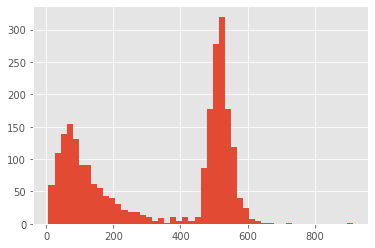

In [ ]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences_test], bins= 50)
plt.show()

In [ ]:
words2index_test = {w:i for i,w in enumerate(words)}
# tags2index_test = {t:i for i,t in enumerate(tags)}
print(words2index_test['combine'])
# print(tags2index_test['B-Instrument'])

5155


In [ ]:
df['tokens_idx'] = df['tokens'].map(words2index_test)
df.head()

,bibcode,label_studio_id,section,tokens,unique_id,ner_ids,ner_tags,tokens_idx
0,2019MNRAS.486.5558S,487,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S,62.0,O,48373
1,2019MNRAS.486.5558S,487,fulltext,a,fulltext_487_2019MNRAS.486.5558S,62.0,O,59895
2,2019MNRAS.486.5558S,487,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S,62.0,O,43294
3,2019MNRAS.486.5558S,487,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S,62.0,O,12836
4,2019MNRAS.486.5558S,487,fulltext,fit,fulltext_487_2019MNRAS.486.5558S,62.0,O,49354


In [ ]:
sentences_test[0][:5]

['ACKNOWLEDGEMENTS', 'We', 'acknowledge', 'helpful', 'comments']

In [ ]:
max_len = 800
X_test = [s for s in sentences_test]


In [ ]:
len(X_test),len(X_test[0]),max([len(i) for i in X_test])

(2385, 186, 913)

In [ ]:
max_len = 800
j=0
test_X = []
for i in range(len(X_test)):
    a = X_test[i].copy()
    if len(X_test[i])==max_len:
      continue
    for k in range(max_len-len(a)):
      a.append("PAD")
    if len(a)==max_len:
      test_X.append(a)
      pass
    else:
      print("nope")
      print(len(X_test[i]))
    

nope
913


In [ ]:
len(test_X),len(test_X[0]),max([len(i) for i in test_X])
# \sentences_test

(2384, 800, 800)

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# y = [[tags2index[w[1]] for w in s] for s in sentences]
# y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
# # y[15]

In [ ]:
# depth=n_tags
# y = tf.one_hot(y, depth)
# y2 = np.eye(depth)[y]

In [ ]:
batch_size=1024

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tok_test = Tokenizer(oov_token="<OOV>")

In [ ]:
# tok_test.fit_on_texts(test_X)
X_test_tokens = tok.texts_to_sequences(X_test)
padded_X_test = pad_sequences(X_test_tokens,padding="post",maxlen=800)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(X_test_tokens, y, test_size=0.1, random_state=2021)

In [ ]:
import tensorflow as tf
X_test_tokens = tf.convert_to_tensor(padded_X_test)

In [ ]:
X_test_tokens.shape

TensorShape([2385, 800])

In [ ]:
X_test[0][:5]

['ACKNOWLEDGEMENTS', 'We', 'acknowledge', 'helpful', 'comments']

## Model predict 

In [ ]:
model_1.load_weights("10epochs_glove_embeddings.h5")

In [ ]:
preds=model_1.predict(X_test_tokens)

In [ ]:
inv_words2index = {v: k  for k,v in words2index.items()}
inv_tags2index = {v: k  for k,v in tags2index.items()}

In [ ]:
pred1 = [i.argmax() for i in preds[0]]
pred2 = [i.argmax() for i in preds[1]]
pred3 = [i.argmax() for i in preds[2]]
pred4 = [i.argmax() for i in preds[3]]
pred5 = [i.argmax() for i in preds[4]]

In [ ]:
pre1_ner_tags = [inv_tags2index[i] for i in pred1]
pre2_ner_tags = [inv_tags2index[i] for i in pred2]
pre3_ner_tags = [inv_tags2index[i] for i in pred3]
pre4_ner_tags = [inv_tags2index[i] for i in pred4]
pre5_ner_tags = [inv_tags2index[i] for i in pred5]

In [ ]:
from collections import Counter
counter1=Counter(pre1_ner_tags)

In [ ]:
counter2=Counter(pre2_ner_tags)
counter3=Counter(pre3_ner_tags)
counter4=Counter(pre4_ner_tags)
counter5=Counter(pre5_ner_tags)

In [ ]:
len(X_test[0])

186

In [ ]:
len(pre1_ner_tags)

800

In [ ]:
for i in range(len(X_test[0])):
  print("Word:",X_test[0][i]," ","Prediction:",pre1_ner_tags[i])

Word: ACKNOWLEDGEMENTS   Prediction: O
Word: We   Prediction: O
Word: acknowledge   Prediction: O
Word: helpful   Prediction: O
Word: comments   Prediction: O
Word: from   Prediction: O
Word: the   Prediction: O
Word: referee,   Prediction: O
Word: which   Prediction: O
Word: helped   Prediction: O
Word: to   Prediction: O
Word: clarify   Prediction: O
Word: several   Prediction: O
Word: aspects   Prediction: O
Word: of   Prediction: O
Word: the   Prediction: O
Word: observations   Prediction: O
Word: and   Prediction: O
Word: analysis   Prediction: O
Word: presented   Prediction: O
Word: in   Prediction: O
Word: this   Prediction: O
Word: paper.   Prediction: O
Word: We   Prediction: O
Word: thank   Prediction: O
Word: STScI   Prediction: B-Person
Word: science   Prediction: I-Organization
Word: and   Prediction: O
Word: technical   Prediction: O
Word: staff   Prediction: O
Word: members   Prediction: O
Word: Peter   Prediction: B-Person
Word: McCullough   Prediction: I-Person
Word: a

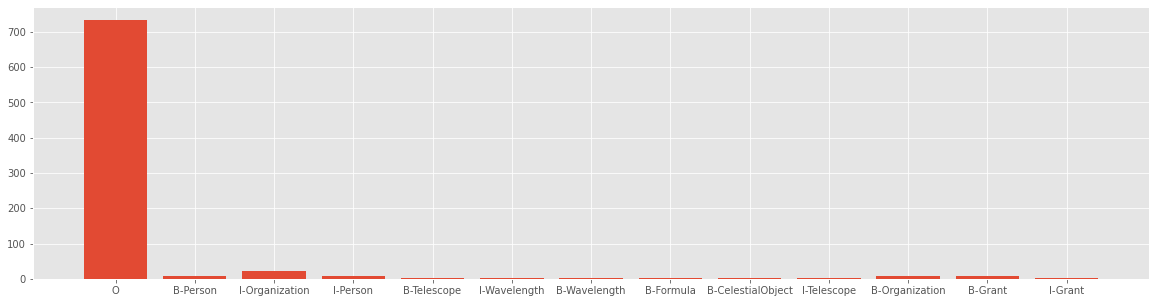

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(list(counter1.keys()),list(counter1.values()),)
plt.show()

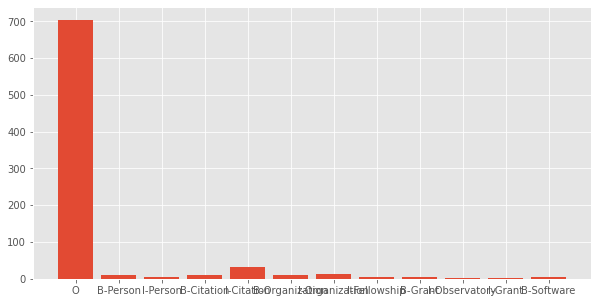

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
plt.bar(list(counter2.keys()),list(counter2.values()),)
plt.show()

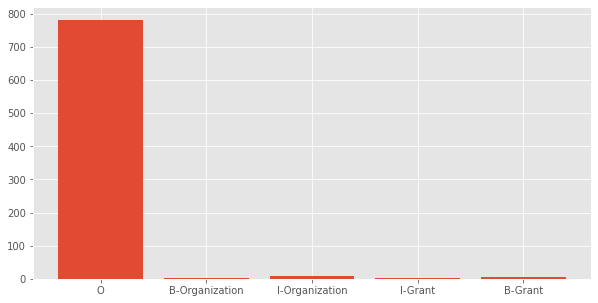

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(10,5))
plt.bar(list(counter3.keys()),list(counter3.values()),)
plt.show()

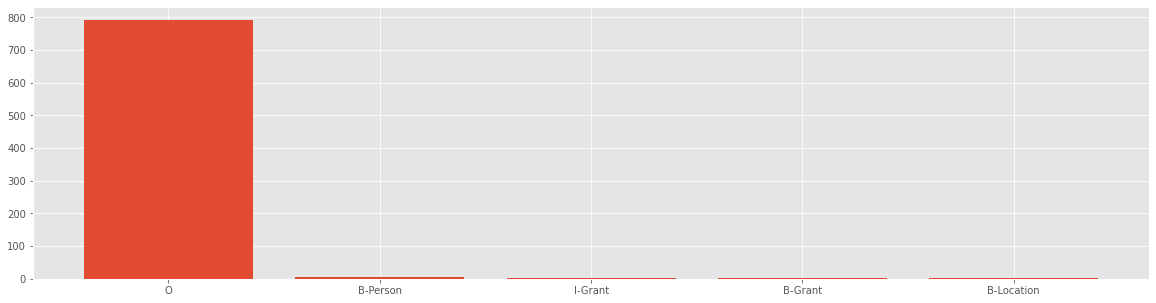

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(list(counter4.keys()),list(counter4.values()),)
plt.show()

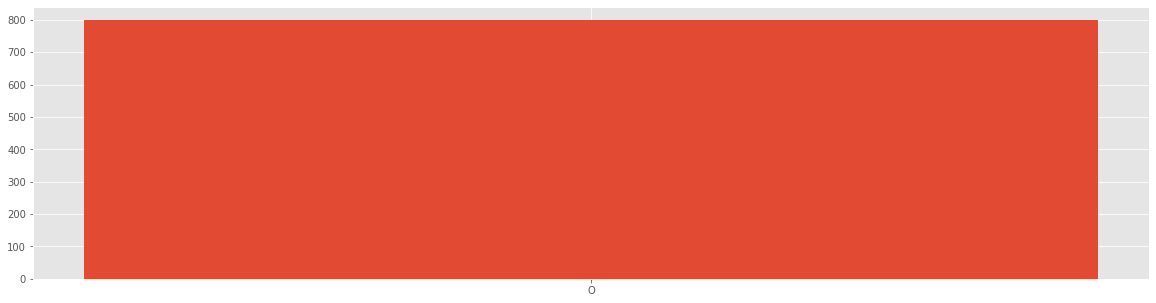

In [ ]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(list(counter5.keys()),list(counter5.values()),)
plt.show()